# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [2]:
data = pd.read_csv("weight-height.csv")
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [10]:
male_df =  data.loc[data["Gender"] == "Male"]
male_df_mean = male_df.mean()
male_df_std = male_df.std()
female_df =  data.loc[data["Gender"] == "Female"]
female_df_mean = female_df.mean()
female_df_std = female_df.std()
print(male_df_mean), print(male_df_std), print(female_df_mean), print(female_df_std)

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Height     69.026346
Weight    187.020621
dtype: float64
Height     2.863362
Weight    19.781155
dtype: float64
Height     63.708774
Weight    135.860093
dtype: float64
Height     2.696284
Weight    19.022468
dtype: float64


(None, None, None, None)

#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

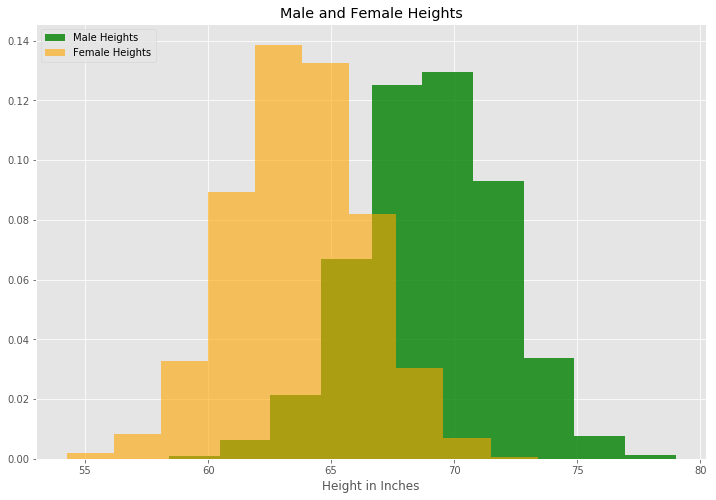

In [37]:
figure = plt.figure(figsize=(12,8))
ax1 = plt.hist(male_df["Height"], label="Male Heights", density=True, bins=10, color= "green", alpha=.8)
ax2 = plt.hist(female_df["Height"], label="Female Heights", density=True, bins=10, color="orange", alpha=.6)
plt.legend(loc='upper left')
plt.title("Male and Female Heights")
plt.xlabel("Height in Inches")
plt.show()

In [ ]:
# Record your observations - are these inline with your personal observations?

# as we can see from the statistics above, the average height of females is smaller than that of males, 
# and both males and females heights present a somewhat normal distribution.

#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density function

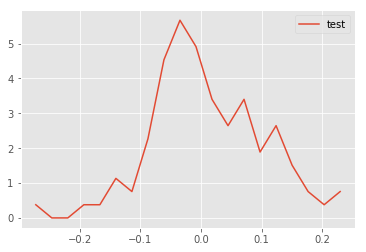

In [39]:
def density(x):
    n, bins = np.histogram(x, 20, density=1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
        
    return pdfx, pdfy



# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

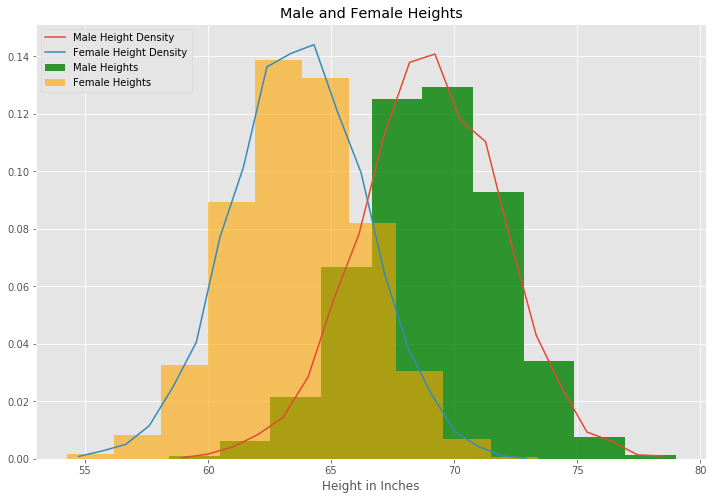

In [46]:
figure = plt.figure(figsize=(12,8))
ax1 = plt.hist(male_df["Height"], label="Male Heights", density=True, bins=10, color= "green", alpha=.8)
ax2 = plt.hist(female_df["Height"], label="Female Heights", density=True, bins=10, color="orange", alpha=.6)
plt.title("Male and Female Heights")
plt.xlabel("Height in Inches")
x,y = density(male_df.Height)
plt.plot(x, y, label="Male Height Density")
x1,y1 = density(female_df.Height)
plt.plot(x1, y1, label="Female Height Density")
plt.legend(loc='upper left')
plt.show()

#### Repeat above exerice for male and female weights

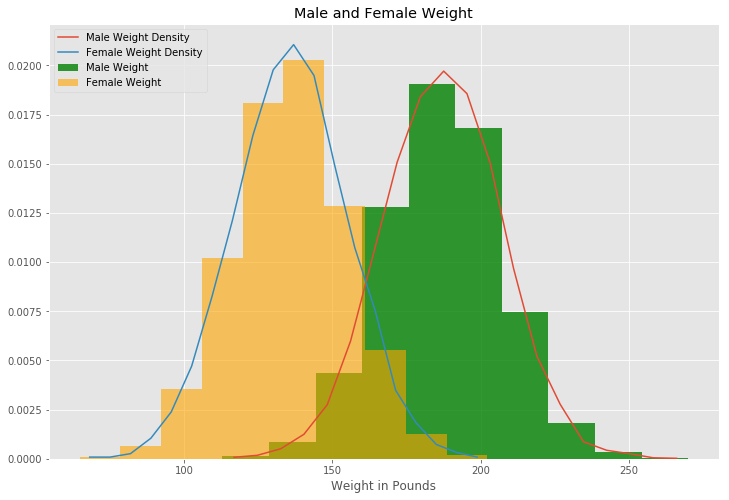

In [47]:
figure = plt.figure(figsize=(12,8))
ax1 = plt.hist(male_df["Weight"], label="Male Weight", density=True, bins=10, color= "green", alpha=.8)
ax2 = plt.hist(female_df["Weight"], label="Female Weight", density=True, bins=10, color="orange", alpha=.6)
plt.title("Male and Female Weight")
plt.xlabel("Weight in Pounds")
x,y = density(male_df.Weight)
plt.plot(x, y, label="Male Weight Density")
x1,y1 = density(female_df.Weight)
plt.plot(x1, y1, label="Female Weight Density")
plt.legend(loc='upper left')
plt.show()

#### Write your observations in the cell below.

In [ ]:
# Record your observations - are these inline with your personal observations?
#Males tend to weight more than females. Both are normally distributed. 

# So whats the takeaway when comparing male and female heights and weights 

Even though there is some overlapping, males are generally taller and heavier than women. 



#### Repeat Above experiments in seaborn and compare with your results. 

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


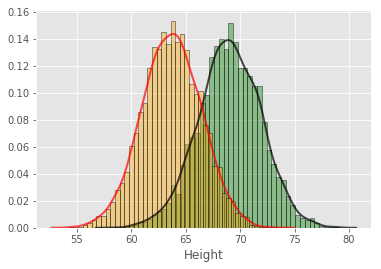

In [55]:
import seaborn as sns

sns.distplot(male_df.Height, 
             hist=True, hist_kws={
                                  "linewidth": 1,
                                  "edgecolor" :'black',
                                  "alpha": 0.4, 
                                  "color":  "green"},
             kde=True, kde_kws = {'linewidth': 2,
                                  'color': "black",
                                  "alpha": 0.7})
sns.distplot(female_df.Height, 
             hist=True, hist_kws={
                                  "linewidth": 1,
                                  "edgecolor" :'black',
                                  "alpha": 0.4, 
                                  "color":  "orange"},
             kde=True, kde_kws = {'linewidth': 2,
                                  'color': "red",
                                  "alpha": 0.7})

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


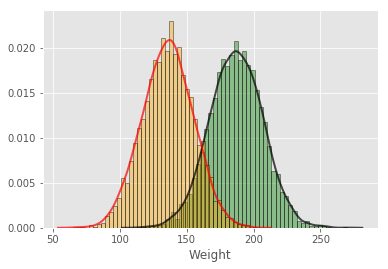

In [56]:
sns.distplot(male_df.Weight, 
             hist=True, hist_kws={
                                  "linewidth": 1,
                                  "edgecolor" :'black',
                                  "alpha": 0.4, 
                                  "color":  "green"},
             kde=True, kde_kws = {'linewidth': 2,
                                  'color': "black",
                                  "alpha": 0.7})
sns.distplot(female_df.Weight, 
             hist=True, hist_kws={
                                  "linewidth": 1,
                                  "edgecolor" :'black',
                                  "alpha": 0.4, 
                                  "color":  "orange"},
             kde=True, kde_kws = {'linewidth': 2,
                                  'color': "red",
                                  "alpha": 0.7})

In [ ]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?
#seaborn is easier to plot and the visuals makes it easier to see the data

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.